<a href="https://colab.research.google.com/github/mille055/AIPI531/blob/main/AIPI531_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 531
**Homework 3**

Chad Miller


1. Build a pipeline for offline RL using d3rlpy:
Hint: In this homework, you will implement a simple pipeline for offline RL using the APIs provided in d3rlpy repository.
[Required] Train CQL:
- Pick (any) one environment/dataset in d3rlpy
(https://github.com/takuseno/d3rlpy).
- Train your CQL agent with the data from the behavior policy.
- Generate true Q vs training steps (may include different dataset sizes, task difficulties) plots.
- Generate estimated Q vs training steps (may include different dataset sizes, task difficulties) plots.
[Optional] Train OPE (FQE):
- Train OPE (FQE) to evaluate the trained policy.
- Generate estimated Q vs training steps (may include different trained policies) plots.
  
 - Include the true Q in the same plots. [Requirements]:
- Build a pipeline for offline RL (data processing, training, evaluation).
- Compare the true Q value with estimated Q value for both offline RL training and offline evaluation (optional).
[Software Setup for Development]:
1. git clone the d3rlpy source code repo (development version) to your local machine (no need to install it on your local machine). https://d3rlpy.readthedocs.io/en/v1.0.0/installation.ht ml#install-from-source
2. Download the Google Drive Desktop (to sync with your Google Drive). https://www.google.com/drive/download/
3. Sync the cloned d3rlpy code repo (on your local machine) with the one in your Google Drive using Google Drive Desktop.
4. Connect the cloned d3rlpy code repo stored in your Google Drive with your Google Colab notebook.
5. Install the cloned d3rlpy code repo in your Google Drive using Google Colab (install it on Colab).
   
https://d3rlpy.readthedocs.io/en/v1.0.0/installation.ht
ml#install-from-source
6. Use any editor (e.g. Sublime, PyCharm, etc.) for the code implementation (modify the code in the cloned d3rlpy repo on your local machine).
7. Test your implementation and running experiments using Colab.
8. Push your code in the cloned d3rlpy repo on your local machine to your repo in your GitHub account.
[Submission]:
(We don’t need a link to your Google Drive. We only need the link to your GitHub using the Colab notebook)
1. Create a new Colab notebook.
2. !pip install git+”your github URL”
3. Training/testing experiments using the Colab notebook.

# Setup

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# installing my fork of the d3rlpy repo which contains modifications for this homework assignment
!pip install git+'https://github.com/mille055/AIPI531-d3rlpy.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/mille055/AIPI531-d3rlpy.git to /tmp/pip-req-build-8_dlnp06
  Running command git clone --filter=blob:none --quiet https://github.com/mille055/AIPI531-d3rlpy.git /tmp/pip-req-build-8_dlnp06
  Resolved https://github.com/mille055/AIPI531-d3rlpy.git to commit bdbbb37bf7fe9411a23907b06aff7405de749a08
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 KB 7.5 MB/s eta 0:00:00
  Created wheel for d3rlpy: filename=d3rlpy-1.1.1-cp39-cp39-linux_x86_64.whl size=1258788 sha256=df5ef1aa67368c29935801e3e0f753a646c7566a98e9b121787f1f32482e7354
  Stored in directory: /tmp/pip-ephem-wheel-cache-jna761la/wheels/c7/1d/0b/17e98dce5ba7216cdb795e775bd7691f7dee958f7153c023d2
Successfully built d3rlpy


In [3]:
!pip install -e .[all]
!pip install gym[all]
!pip install -e .[docs,tests,extra] 
#!pip install git+https://github.com/rail-berkeley/d4rl
#!pip install git+https://github.com/takuseno/d4rl-atari
#!pip install gym[atari]
!pip install --upgrade gym==0.19.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content
ERROR: file:///content does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 KB 37.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 94.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 KB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 85.2 MB/s

In [5]:
import d3rlpy
from d3rlpy.algos import CQL
from d3rlpy.algos.cql import DiscreteCQL

from d3rlpy.dataset import MDPDataset
from d3rlpy.datasets import get_atari, get_cartpole

from d3rlpy.metrics import initial_state_value_estimation_scorer
#import true_q_scorer which was added to the repo for this homework assignment
from d3rlpy.metrics.scorer import average_value_estimation_scorer, true_q_scorer

from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import gym
import shutil


In [17]:


shutil.rmtree('/content/d3rlpy_logs', ignore_errors=True)


# prepare dataset
dataset, env = get_cartpole()

# split dataset
train_episodes, test_episodes = train_test_split(dataset, test_size=0.2)

# prepare algorithm
cql = DiscreteCQL(use_gpu=True)

# start training
results = cql.fit(
    train_episodes,
    eval_episodes=test_episodes,
    n_epochs=10,
    scorers={
        "estimated_q": initial_state_value_estimation_scorer,
       'true_q': true_q_scorer
    },
    experiment_name = "CQL-cartpole",
    with_timestamp = False
)

/usr/local/lib/python3.9/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


TypeError: ignored

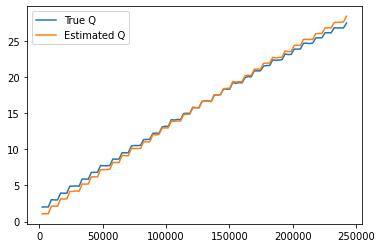

In [16]:
true_q = pd.read_csv('/content/d3rlpy_logs/CQL-cartpole_20230323014433/true_q.csv',header=None)
estimated_q = pd.read_csv('/content/d3rlpy_logs/CQL-cartpole_20230323014433/estimated_q.csv',header=None)

true_q.columns = ['0', 'training steps', 'True Q']
estimated_q.columns = ['0', 'training steps', 'Estimated Q']

plt.plot(true_q['training steps'],true_q['True Q'])
plt.plot(estimated_q['training steps'],estimated_q['Estimated Q'])
plt.legend(['True Q','Estimated Q'])